Objective: Analyze and visualize the sales data for a retail superstore to identify trends and patterns in sales, profits, and order quantities across different regions, categories, and time periods.<br>
Dataset: https://www.kaggle.com/datasets/jr2ngb/superstore-data

Questions:<br>

Which region has the highest sales and profits?<br>
What is the distribution of sales across product categories and sub-categories?<br>
How is the relationship between sales and profit?<br>
Which product categories contribute the most to sales and profits?<br>
How have monthly sales changed over time?<br>
How effective are the visualizations in answering these questions, and what improvements can be made?

In [1]:
#import require libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
df=pd.read_csv('superstore_dataset2011-2015.csv')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [4]:
df.shape

(51290, 24)

In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

There are 51,290 rows and 24 columns in data

#### Drop unnecessary columns


In [6]:
df=df.drop(['Row ID','Order ID','Customer ID','Customer Name'],axis=1)

In [7]:
df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'City', 'State',
       'Country', 'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order Date      51290 non-null  object 
 1   Ship Date       51290 non-null  object 
 2   Ship Mode       51290 non-null  object 
 3   Segment         51290 non-null  object 
 4   City            51290 non-null  object 
 5   State           51290 non-null  object 
 6   Country         51290 non-null  object 
 7   Postal Code     9994 non-null   float64
 8   Market          51290 non-null  object 
 9   Region          51290 non-null  object 
 10  Product ID      51290 non-null  object 
 11  Category        51290 non-null  object 
 12  Sub-Category    51290 non-null  object 
 13  Product Name    51290 non-null  object 
 14  Sales           51290 non-null  float64
 15  Quantity        51290 non-null  int64  
 16  Discount        51290 non-null  float64
 17  Profit          51290 non-null 

Handle Missing Values

In [9]:
df.isnull().sum()

Order Date            0
Ship Date             0
Ship Mode             0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [10]:
#drop the postal code as it contains many missing values

df=df.drop(['Postal Code'],axis=1)
df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'City', 'State',
       'Country', 'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [11]:
df.isnull().sum()

Order Date        0
Ship Date         0
Ship Mode         0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [12]:
df.describe()

,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.610982,26.375915
std,487.565361,2.278766,0.212280,174.340972,57.296804
min,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000
50%,85.053000,3.000000,0.000000,9.240000,7.790000
75%,251.053200,5.000000,0.200000,36.810000,24.450000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000


we can observe decriptive stats for all numerical cols

#### convert order date and ship date to timeformat

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Date      51290 non-null  datetime64[ns]
 1   Ship Date       51290 non-null  datetime64[ns]
 2   Ship Mode       51290 non-null  object        
 3   Segment         51290 non-null  object        
 4   City            51290 non-null  object        
 5   State           51290 non-null  object        
 6   Country         51290 non-null  object        
 7   Market          51290 non-null  object        
 8   Region          51290 non-null  object        
 9   Product ID      51290 non-null  object        
 10  Category        51290 non-null  object        
 11  Sub-Category    51290 non-null  object        
 12  Product Name    51290 non-null  object        
 13  Sales           51290 non-null  float64       
 14  Quantity        51290 non-null  int64         
 15  Di

In [15]:
df['Order Year'] = df['Order Date'].dt.year

In [16]:
df['Order Year'].value_counts()

2014    17531
2013    13799
2012    10962
2011     8998
Name: Order Year, dtype: int64

In [17]:
df['Ship Year'] = df['Ship Date'].dt.year

In [18]:
df['Ship Year'].value_counts()

2014    17429
2013    13772
2012    10974
2011     8829
2015      286
Name: Ship Year, dtype: int64

#### Univariate Analysis

<AxesSubplot:>

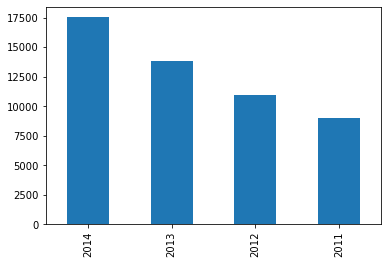

In [19]:
df['Order Year'].value_counts().plot(kind='bar')

From the above plot we can observe that most of the orders are placed in 2014

<AxesSubplot:>

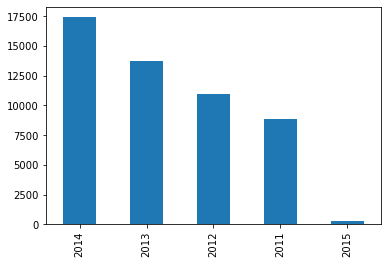

In [20]:
df['Ship Year'].value_counts().plot(kind='bar')

From the above plot we can observe that most of the orders are shipped in the in 2014 and 2015 has low no of shipped orders

Segment

<AxesSubplot:xlabel='Segment', ylabel='count'>

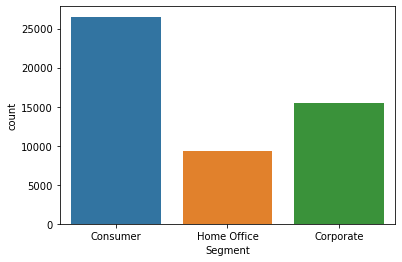

In [21]:
sn.countplot(x='Segment',data=df)

Based on the plot, we can observe that the majority of the customers belong to the consumer segment.

Ship Mode

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

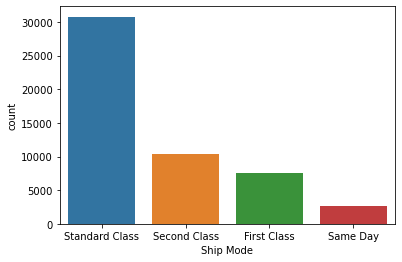

In [22]:
sn.countplot(x='Ship Mode',data=df)

From the above plot, we can observe that the majority of the ship mode belong to the standard class, and same day shipping mode is least compared to all other modes.

Category

<AxesSubplot:xlabel='Category', ylabel='count'>

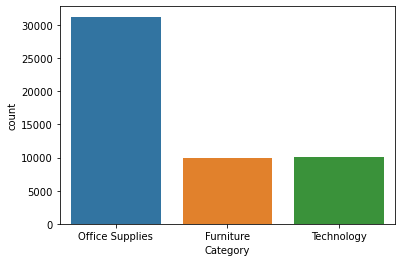

In [23]:
sn.countplot(x='Category',data=df)

from the above plot, we can observe that the majority of the products are belong to the office supplies.

Sub Category

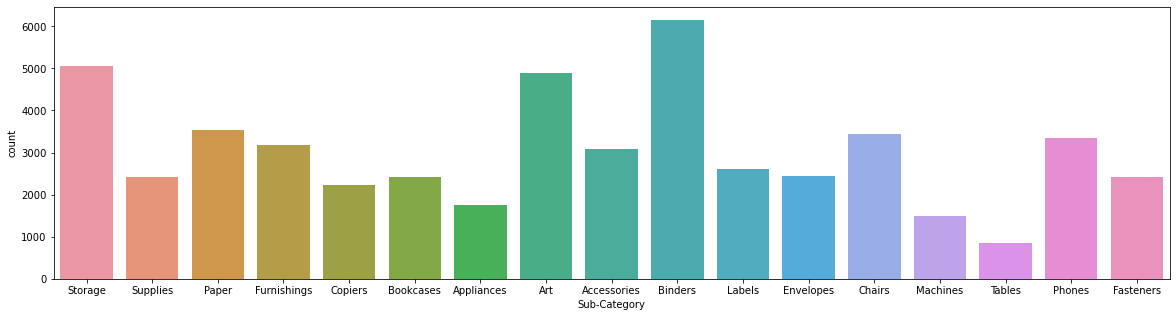

In [24]:
plt.figure(figsize=(20,5))
sn.countplot(x='Sub-Category',data=df)
plt.show()

from the above plot, we can observe that the majority of the products are binders,storage and art type of products.

Quantity

<AxesSubplot:ylabel='Quantity'>

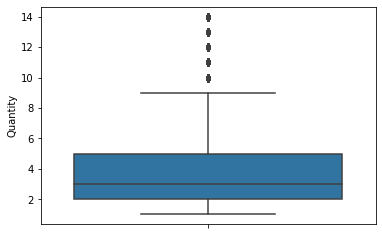

In [25]:
sn.boxplot(y='Quantity',data=df)

The quantity of products are min 1, maximum 14 and average 3-4 products are shipped.

Order Priority

<AxesSubplot:xlabel='Order Priority', ylabel='count'>

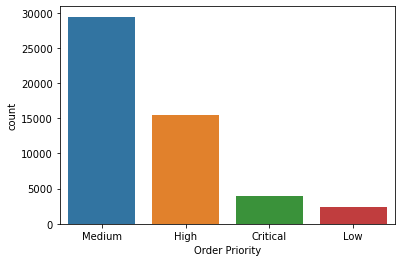

In [26]:
sn.countplot(x='Order Priority',data=df)

From the above plot we can observe that most of the order priority belongs to medium

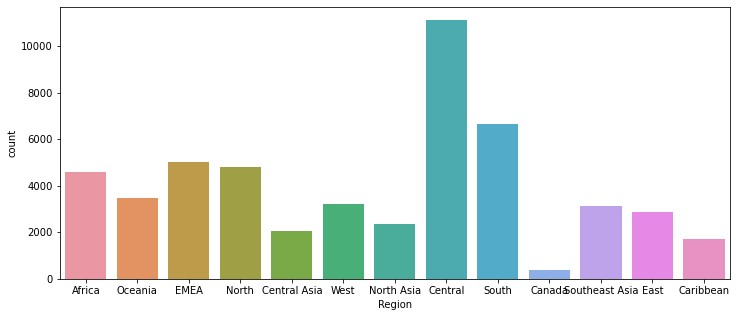

In [27]:
plt.figure(figsize=(12,5))
sn.countplot(x='Region',data=df)
plt.show()

Correlation between variables

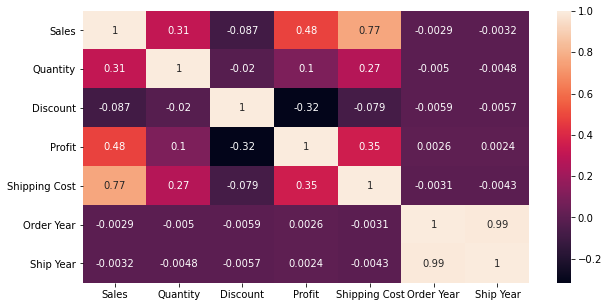

In [28]:
plt.figure(figsize=(10,5))
sn.heatmap(df.corr(),annot=True)
plt.show()

We can observe that there is strong correlation between shippingcost and sales. and positive relation between sales and profit

#### Bivariate Analysis

In [29]:
df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'City', 'State',
       'Country', 'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority', 'Order Year', 'Ship Year'],
      dtype='object')

Sales vs Ship Mode

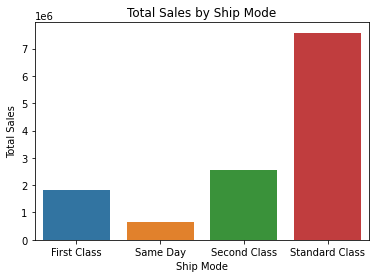

In [30]:
sales_by_mode = df.groupby('Ship Mode').sum()['Sales'].reset_index()

sn.barplot(data=sales_by_mode, x='Ship Mode', y='Sales')

plt.title('Total Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')
plt.show()

we can observe that most of the sales are from standard class ship mode

Profit Vs Ship mode

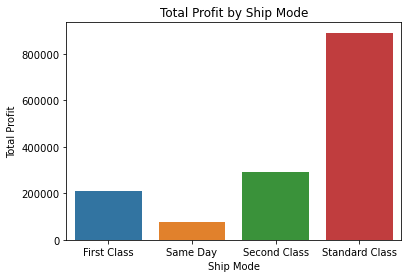

In [31]:
profit_by_mode = df.groupby('Ship Mode').sum()['Profit'].reset_index()

sn.barplot(data=profit_by_mode, x='Ship Mode', y='Profit')

plt.title('Total Profit by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Profit')
plt.show()

we can observe that standard class ship mode has highest profit

Segment Vs sales

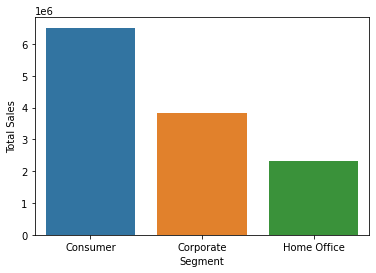

In [32]:
segment = df.groupby('Segment').sum()['Sales'].reset_index()

sn.barplot(data=segment, x='Segment', y='Sales')

plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.show()

Segment vs profit

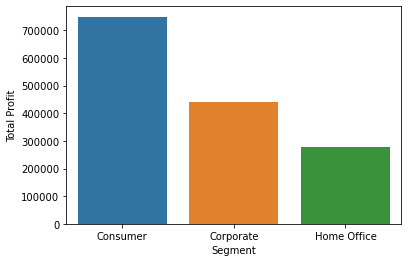

In [33]:
segment = df.groupby('Segment').sum()['Profit'].reset_index()

sn.barplot(data=segment, x='Segment', y='Profit')

plt.xlabel('Segment')
plt.ylabel('Total Profit')
plt.show()

From the above plots we can observe that sales and profits are high in consumer segment and least in home office segment

Region VS SALES

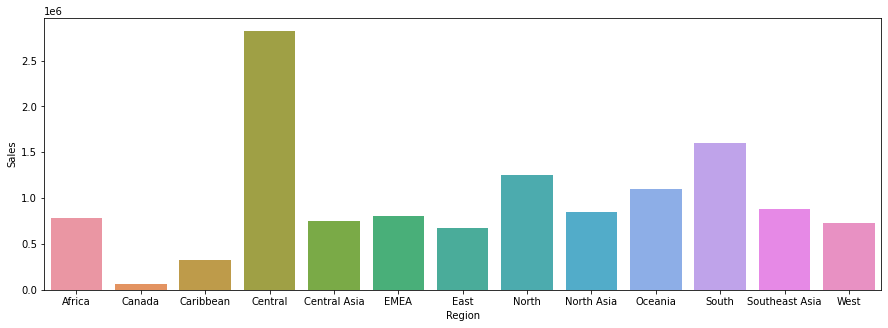

In [34]:
Region= df.groupby('Region').sum()['Sales'].reset_index()

plt.figure(figsize=(15,5))
sn.barplot(data=Region, x='Region', y='Sales')
plt.show()

Region Vs profit

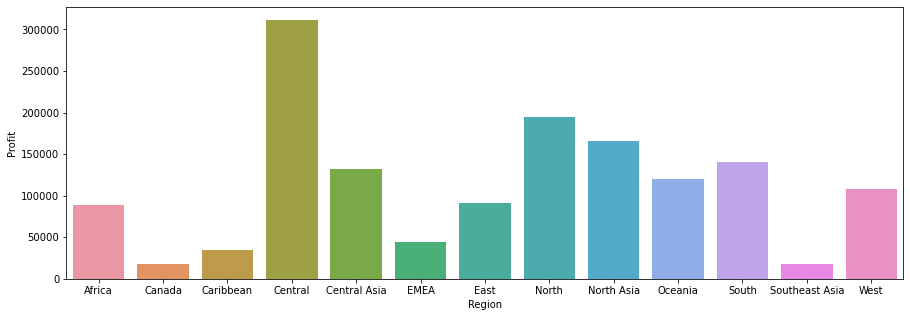

In [35]:
Region= df.groupby('Region').sum()['Profit'].reset_index()

plt.figure(figsize=(15,5))
sn.barplot(data=Region, x='Region', y='Profit')
plt.show()

we can observe that central region has highest sales and profits among all other regions.

Market vs sales

<AxesSubplot:xlabel='Market', ylabel='Profit'>

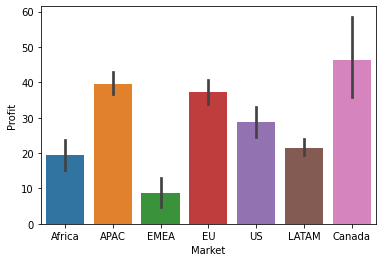

In [36]:
sn.barplot(x='Market', y='Profit', data=df)

Canada market has higher profit than other markets

Market vs sales

<AxesSubplot:xlabel='Market', ylabel='Sales'>

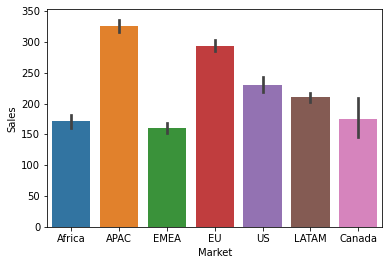

In [37]:
sn.barplot(x='Market', y='Sales', data=df)

Apac market has higher sales than other markets

Category vs sales

<AxesSubplot:xlabel='Category', ylabel='Sales'>

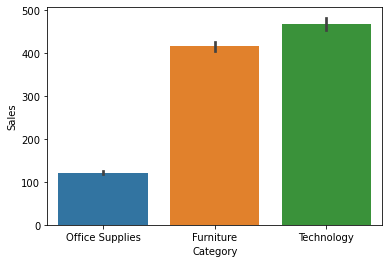

In [38]:
sn.barplot(x='Category', y='Sales', data=df)

Category vs Profit

<AxesSubplot:xlabel='Category', ylabel='Profit'>

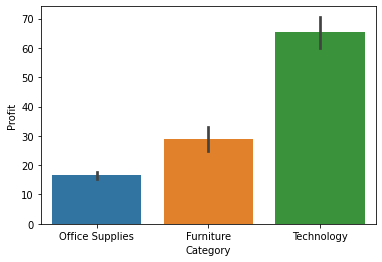

In [39]:
sn.barplot(x='Category', y='Profit', data=df)

From the above plots we can observe that technology category has highest sales and profits

Sub category vs sales

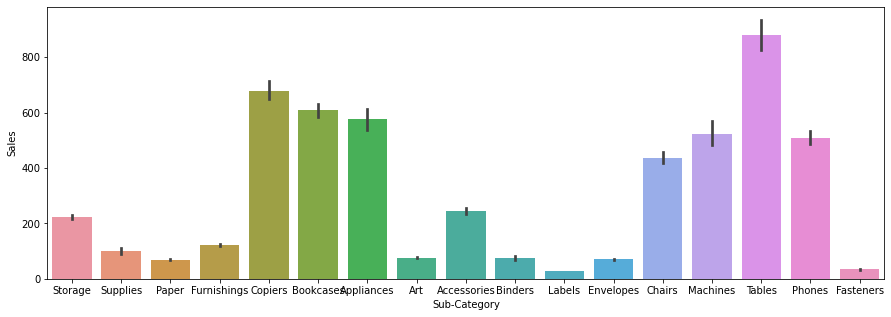

In [40]:
plt.figure(figsize=(15,5))
sn.barplot(x='Sub-Category', y='Sales', data=df)
plt.show()

From the above plot we can observe that tables has highest number of sales.

Order priority vs sales

<AxesSubplot:xlabel='Order Priority', ylabel='Sales'>

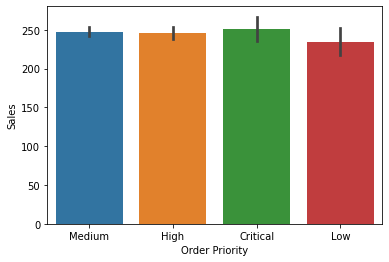

In [41]:
sn.barplot(x='Order Priority', y='Sales', data=df)

from the above plot we can observe that sales is almost same among all types of order priority. but overall critical type has highest sales and low type has less sales

<AxesSubplot:xlabel='Order Priority', ylabel='Profit'>

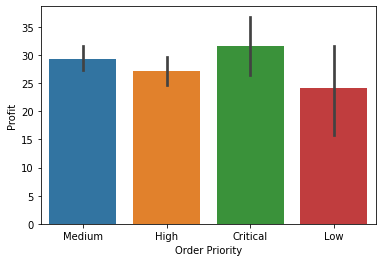

In [42]:
sn.barplot(x='Order Priority', y='Profit', data=df)

From the above plots we can observe that profit is higher in crtitcal type.

Profit vs sales

<AxesSubplot:xlabel='Profit', ylabel='Sales'>

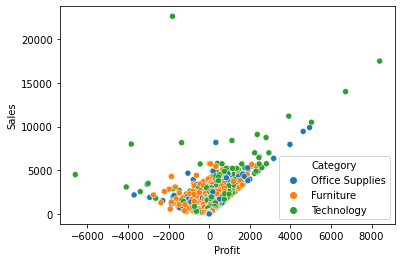

In [43]:
sn.scatterplot(x='Profit',y='Sales',hue='Category',data=df)

From the above plot we can observe that sales and profit has linear relationship

### Questions

#### 1) Which region has the highest sales and profits?<br>



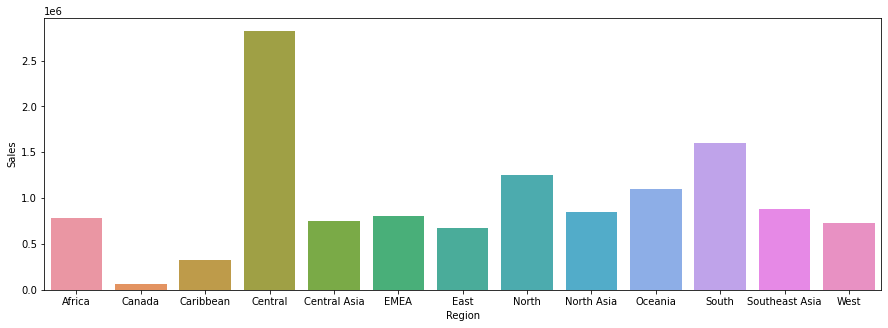

In [44]:
Region= df.groupby('Region').sum()['Sales'].reset_index()

plt.figure(figsize=(15,5))
sn.barplot(data=Region, x='Region', y='Sales')
plt.show()

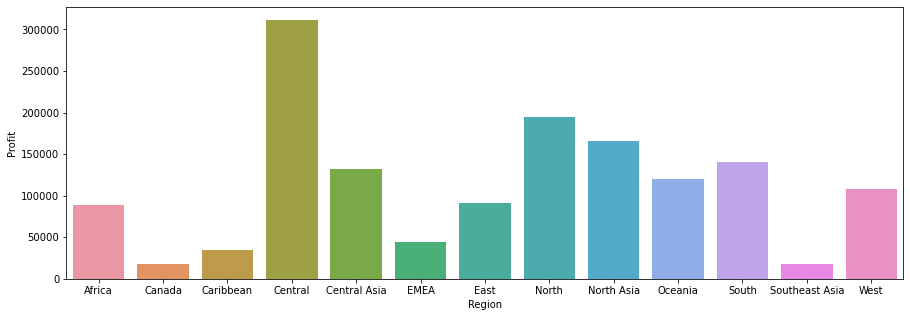

In [45]:
Region= df.groupby('Region').sum()['Profit'].reset_index()

plt.figure(figsize=(15,5))
sn.barplot(data=Region, x='Region', y='Profit')
plt.show()

<h4>A) Central region has highest number of sales and profits</h4>

#### 2)What is the distribution of sales across product categories and sub-categories?

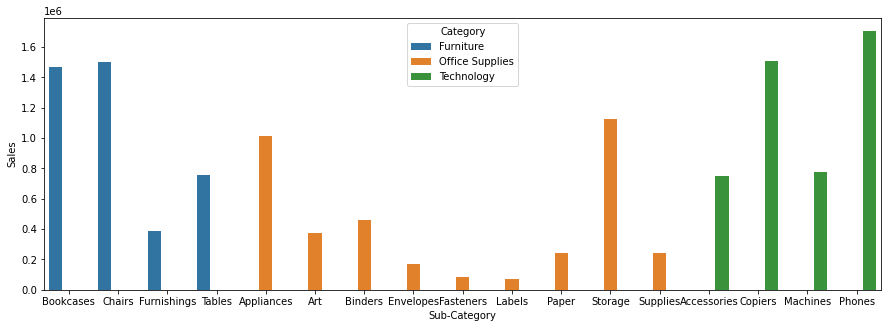

In [46]:
sales_by_category = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
plt.figure(figsize=(15,5))
sn.barplot(y='Sales', x='Sub-Category', hue='Category', data=sales_by_category)
plt.show()

A)Distribution of sales is highest in technology and office supplies category.<br>
In technology category phones and copiers has highest number of sales<br>
In office supplies category appliances and storage has highest number of sales.

#### 3)How is the relationship between sales and profit?

<AxesSubplot:xlabel='Profit', ylabel='Sales'>

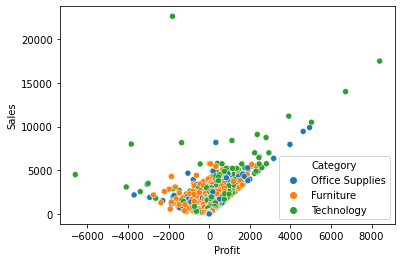

In [47]:
sn.scatterplot(x='Profit',y='Sales',hue='Category',data=df)

Relationship between sales and profit is positively correlated. If the sales increases profit also increases.

#### 4) Which product categories contribute the most to sales and profits?

<AxesSubplot:xlabel='Category', ylabel='Sales'>

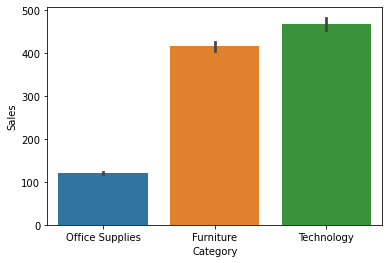

In [49]:
sn.barplot(x='Category', y='Sales', data=df)

<AxesSubplot:xlabel='Category', ylabel='Profit'>

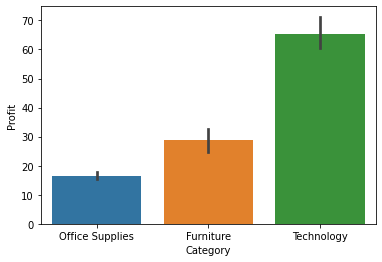

In [50]:
sn.barplot(x='Category', y='Profit', data=df)

Technology product category contribute the most to profits and sales

#### 5)How have monthly sales changed over time?

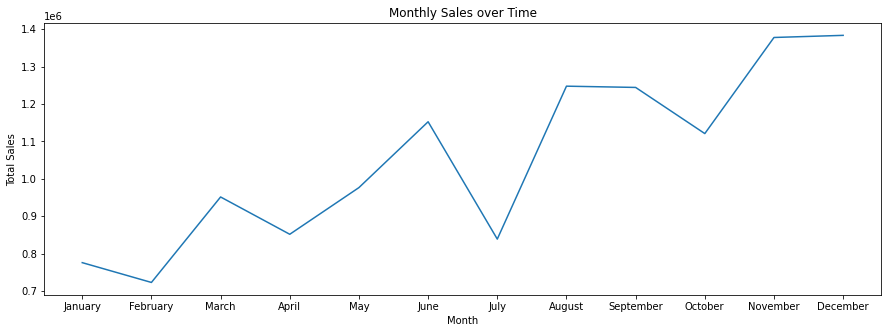

In [55]:
# extract month from order date
df['Month'] = df['Order Date'].dt.month
monthly_sales = df.groupby('Month')['Sales'].sum()

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(15,5))
plt.plot(month_names, monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales over Time')
plt.show()

From the above plot we can observe that sales is declined in february and slightly increases in march before declining in april. Then sales increases from may to june and declined in july before increases from august. and sales again declined in november, Finally sales increased in december.<br>
These trends suggests that sales increases in seasons and holidays .sales increased in summer and spring months and decreases in winter months. 

#### 6)How effective are the visualizations in answering these questions, and what improvements can be made?

Data visualization is essential to understand data because it helps us to see patterns and insights that might be difficult to see in raw data.<br> Visualizations can help us to identify outliers, anomalies, and errors in our data, which can be crucial for making accurate and informed decisions. <br>
we can improve visualization by adding labels and using advanced visualization or hover effects.